In [1]:
from matplotlib import pyplot
import pandas as pd
import seaborn as sb

In [2]:
ignore_corpora = ['feminisms', 'feminismuncensored', 'fireyfemmes']
weak_powerful_df = pd.read_csv('weak_powerful_wefat.csv', index_col=0).drop(ignore_corpora, axis=1).sort_index()
safe_dangerous_df = pd.read_csv('safe_dangerous_wefat.csv', index_col=0).drop(ignore_corpora, axis=1).sort_index()

In [3]:
def plot_incels_and_feminism(df, incel_corpora, title):
    feminism_df = df.drop(incel_corpora, axis=1)
    incel_df = df[incel_corpora]

    dims = (5, 16)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=dims)
    sb.heatmap(ax=ax1, data=feminism_df, center=0, vmin=-1, vmax=1, square=True, cbar=False)
    ax1.set_ylabel('target word')
    ax1.set_title('Feminism subreddits')

    sb.heatmap(ax=ax2, data=incel_df, center=0, vmin=-1, vmax=1, square=True, cbar_kws={'label': 'WEFAT score', 'pad': 0.2})
    ax2.set_ylabel('')
    ax2.set_yticks([])
    ax2.set_title('Incel subreddits')
    fig.suptitle(title, )

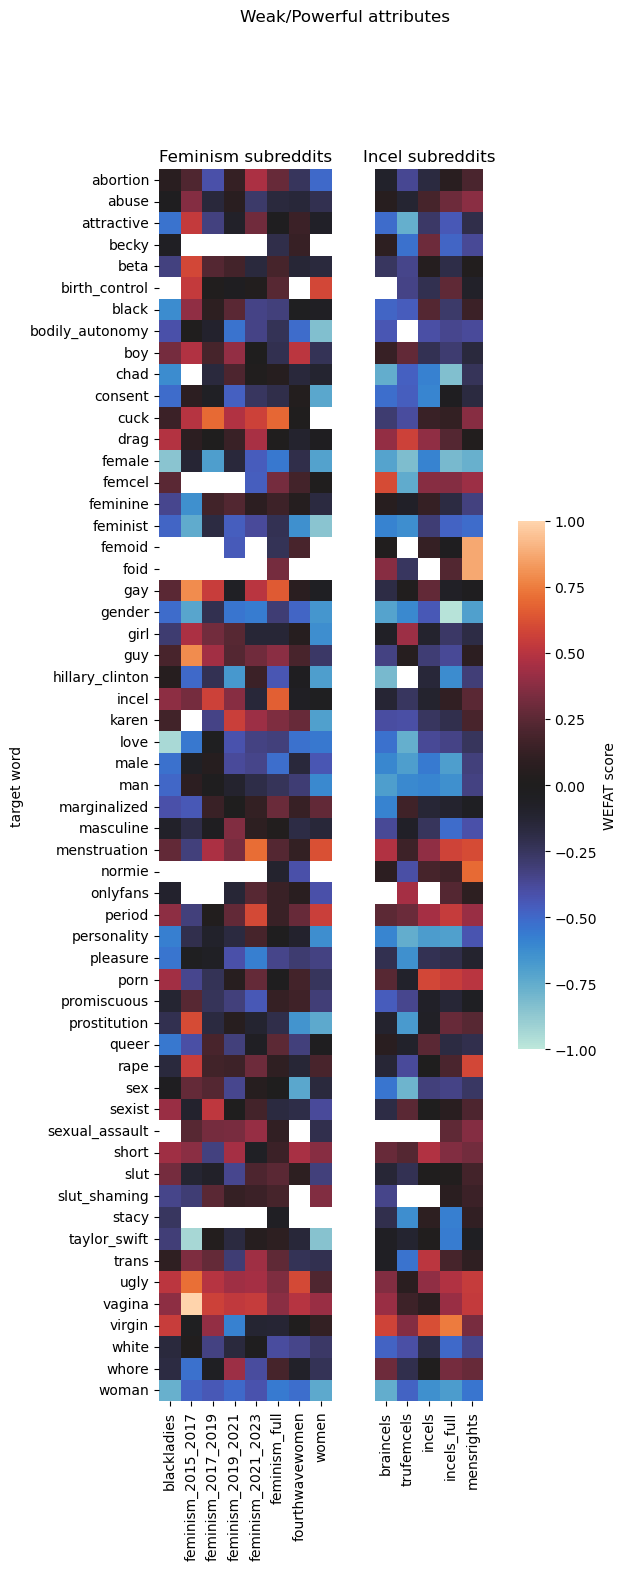

In [4]:
incel_corpora = ['braincels', 'trufemcels', 'incels', 'incels_full', 'mensrights']
plot_incels_and_feminism(weak_powerful_df, incel_corpora, 'Weak/Powerful attributes')

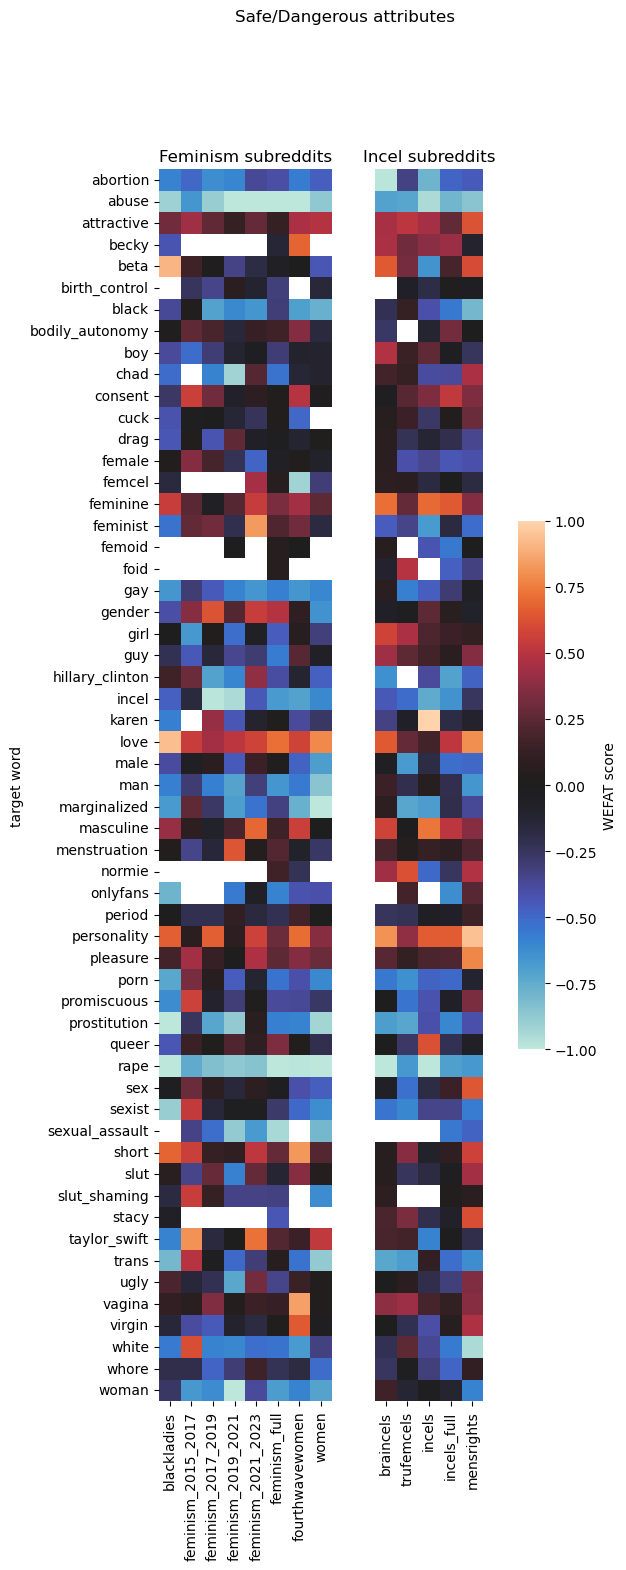

In [5]:
incel_corpora = ['braincels', 'trufemcels', 'incels', 'incels_full', 'mensrights']
plot_incels_and_feminism(safe_dangerous_df, incel_corpora, 'Safe/Dangerous attributes')

In [50]:
# return df where signs mismatch
# convert signs to words
def sign_mismatch(df, cols):
    if len(cols) == 2:
        return df[cols].loc[df[cols[0]] * df[cols[1]] < 0]
    elif len(cols) == 4:
        return df[cols].loc[df[cols[0]] * df[cols[1]] * df[cols[2]] * df[cols[3]]< 0]
    
    

In [98]:
def find_overlap_attributes(safe_dangerous_df, weak_powerful_df, cols):
    exp_1 = sign_mismatch(safe_dangerous_df, cols)
    exp_2 = sign_mismatch(weak_powerful_df, cols)
    return list(set(exp_1.index).intersection(set(exp_2.index)))

In [52]:
def turn_sign_into_word(df, cols, pos_word, neg_word):
    df = df.copy()
    for col in cols:
        df[col] = df[col].apply(lambda x: pos_word if x > 0 else neg_word)

    return df

In [135]:
def plot_sign_mismatch(safe_dangerous_df, weak_powerful_df, cols, dims):
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=dims)
    overlap = find_overlap_attributes(safe_dangerous_df, weak_powerful_df, cols)

    sign_mismatch_df = sign_mismatch(safe_dangerous_df, cols).loc[overlap]
    labels = turn_sign_into_word(sign_mismatch_df, cols, 'safe', 'dangerous').loc[overlap]
    sb.heatmap(ax=ax1, data=sign_mismatch_df, center=0, vmin=-1, vmax=1, square=True, annot=labels, fmt="", cbar=False)
    ax1.set_ylabel('target word')
    ax1.set_title('Safe/Dangerous')

    sign_mismatch_df = sign_mismatch(weak_powerful_df, cols).loc[overlap]
    labels = turn_sign_into_word(sign_mismatch_df, cols, 'weak', 'powerful').loc[overlap]
    sb.heatmap(ax=ax2, data=sign_mismatch_df, center=0, vmin=-1, vmax=1, square=True, annot=labels, fmt="", cbar_kws={'label': 'WEFAT score', 'pad': 0.2})
    ax2.set_ylabel('')
    ax2.set_yticks([])
    ax2.set_title('Weak/Powerful')

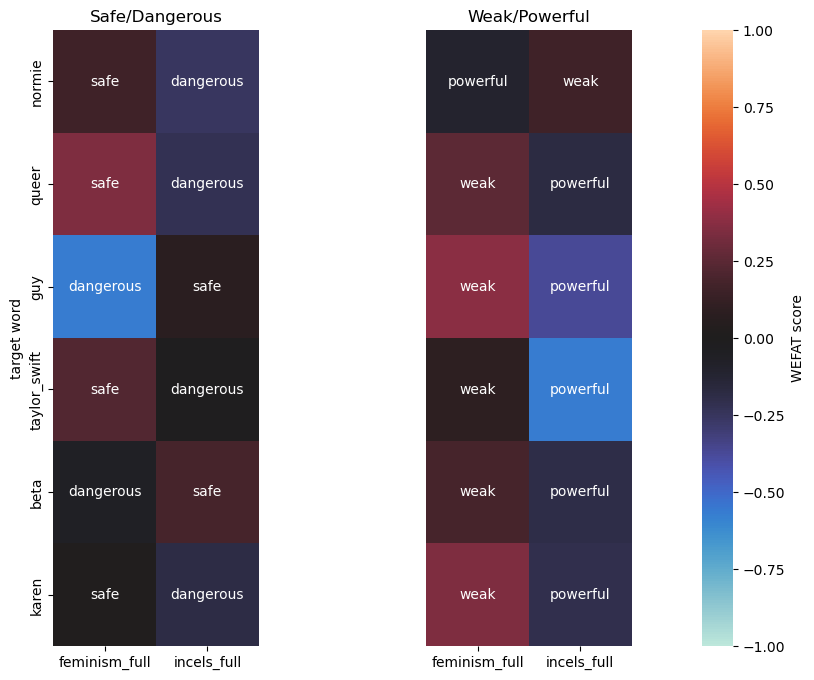

In [137]:
plot_sign_mismatch(safe_dangerous_df, weak_powerful_df, ['feminism_full', 'incels_full'], (10, 8))

In [63]:
def shape_df_for_scatter(df):
    df = df.T
    df.reset_index(inplace=True)
    return df.melt(id_vars=["index"], var_name="word", value_name="wefat")

In [140]:
def plot_timeline(safe_dangerous_df, weak_powerful_df, cols, overlap):
    sign_safe_dangerous = sign_mismatch(safe_dangerous_df, cols).loc[overlap]

    sign_safe_shaped = shape_df_for_scatter(sign_safe_dangerous)
    dims = (16, 8)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=dims)
    sb.lineplot(ax=ax1, data=sign_safe_shaped, x="index", y="wefat", hue="word")
    ax1.set_ylabel('WEFAT score ("safeness")')
    ax1.set_xlabel('')
    ax1.set_title('Safe/Dangerous')

    sign_weak_powerful = sign_mismatch(weak_powerful_df, cols).loc[overlap]
    sign_weak_shaped = shape_df_for_scatter(sign_weak_powerful)
    sb.lineplot(ax=ax2, data=sign_weak_shaped, x="index", y="wefat", hue="word")
    ax2.set_ylabel('WEFAT score ("weakness")')
    ax2.set_xlabel('')
    ax2.set_title('Weak/Powerful')
    ax2.legend({})

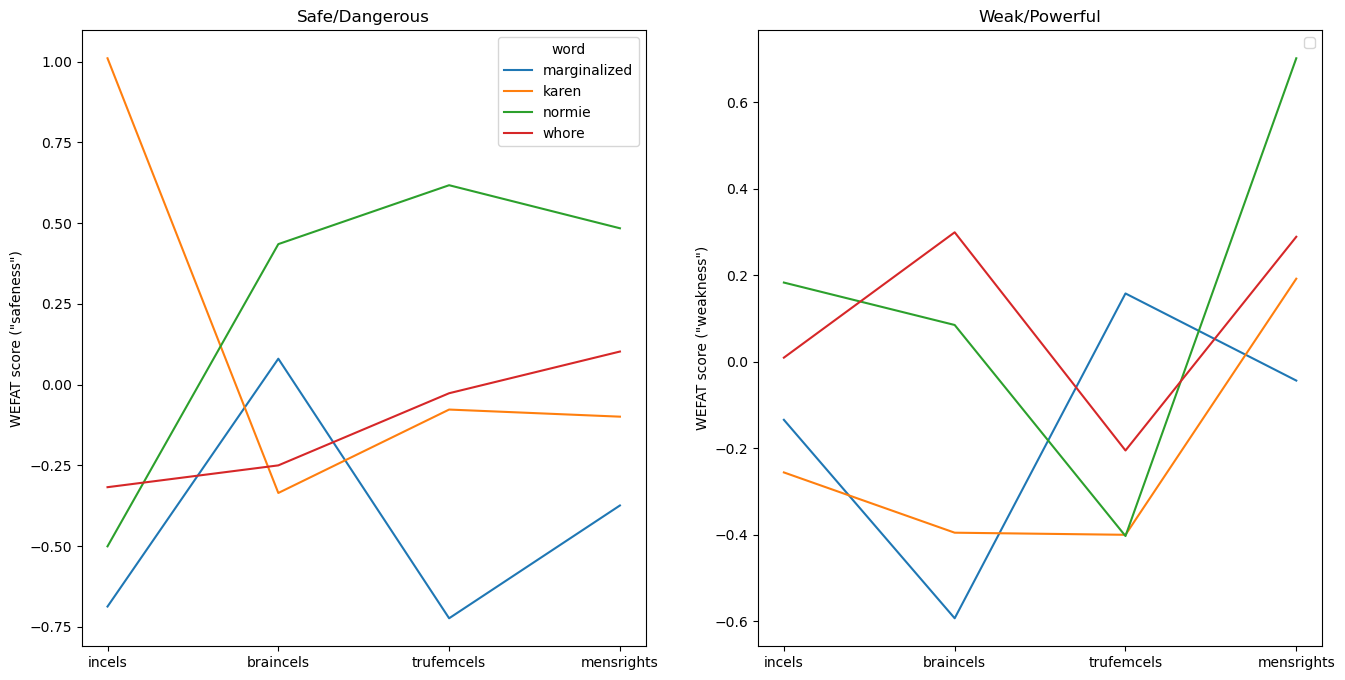

In [141]:
cols = ['incels', 'braincels', 'trufemcels', 'mensrights']
overlap = find_overlap_attributes(safe_dangerous_df, weak_powerful_df, cols)
plot_timeline(safe_dangerous_df, weak_powerful_df, cols, overlap)

In [145]:
overlap

['sex',
 'consent',
 'birth_control',
 'feminine',
 'sexist',
 'whore',
 'black',
 'bodily_autonomy',
 'girl',
 'period',
 'trans',
 'white']

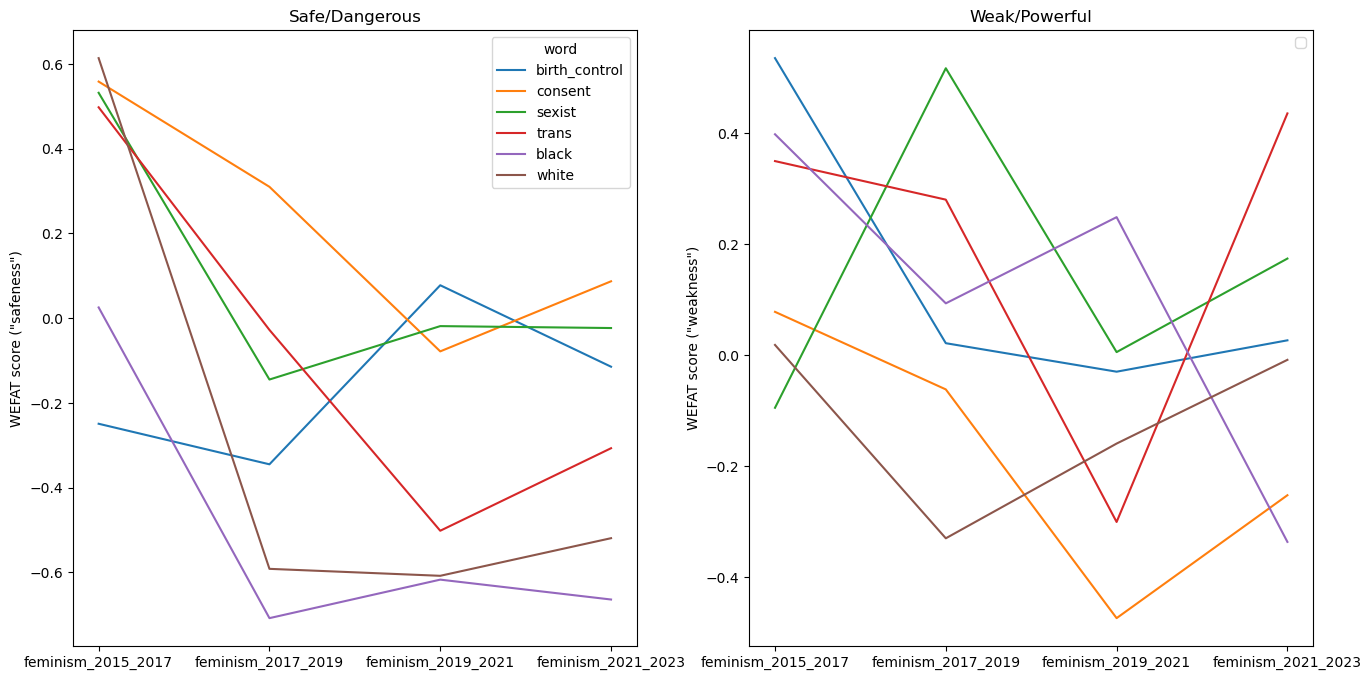

In [146]:
cols = ['feminism_2015_2017', 'feminism_2017_2019', 'feminism_2019_2021', 'feminism_2021_2023']
overlap = find_overlap_attributes(safe_dangerous_df, weak_powerful_df, cols)
plot_timeline(safe_dangerous_df, weak_powerful_df, cols, ['birth_control', 'consent', 'sexist', 'trans', 'black', 'white'])

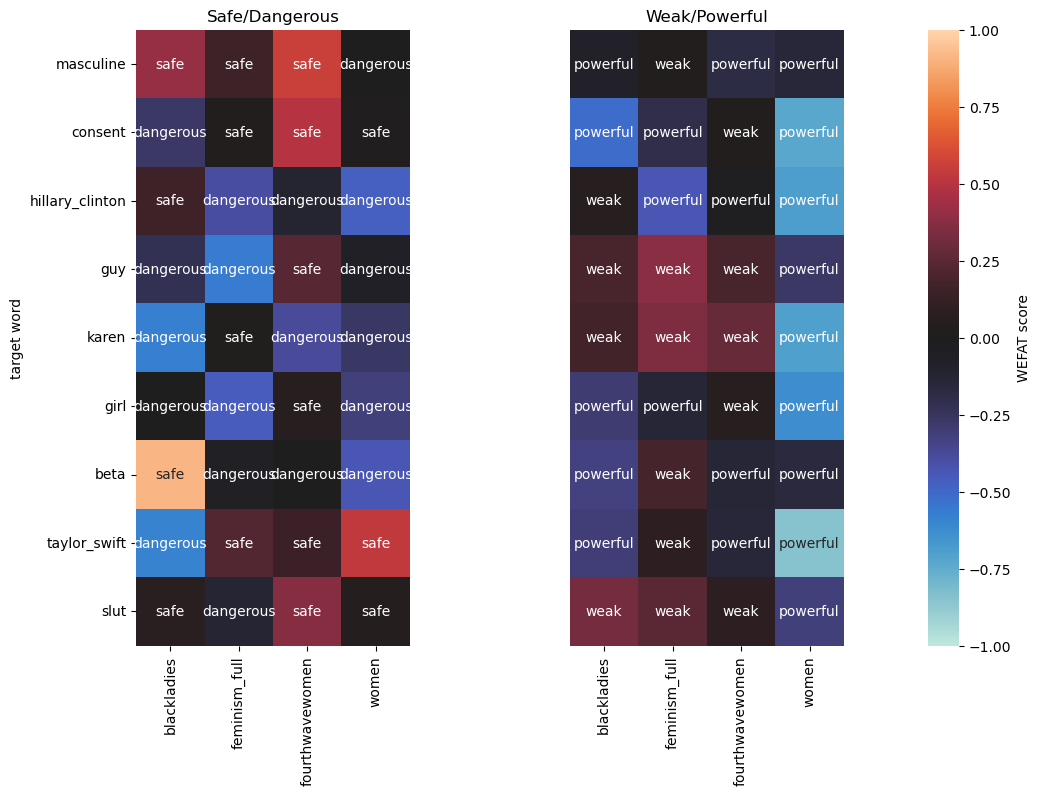

In [138]:
plot_sign_mismatch(safe_dangerous_df, weak_powerful_df, ['blackladies', 'feminism_full', 'fourthwavewomen', 'women'], (12, 8))